In [34]:
import pandas as pd
import matplotlib.pyplot  as plt
import seaborn as sns

# Exploratory Data Analysis

In [23]:
adult_census = pd.read_csv("../_data/adult.csv")

adult_census.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [32]:
target_column = "class"
numerical_columns = [
    "age", "education-num", "capital-gain", "capital-loss",
    "hours-per-week"]
categorical_columns = [
    "workclass", "education", "marital-status", "occupation",
    "relationship", "race", "sex", "native-country"]
all_columns = numerical_columns + categorical_columns + [target_column]

adult_census = adult_census[all_columns]

## Inspecting numerical data

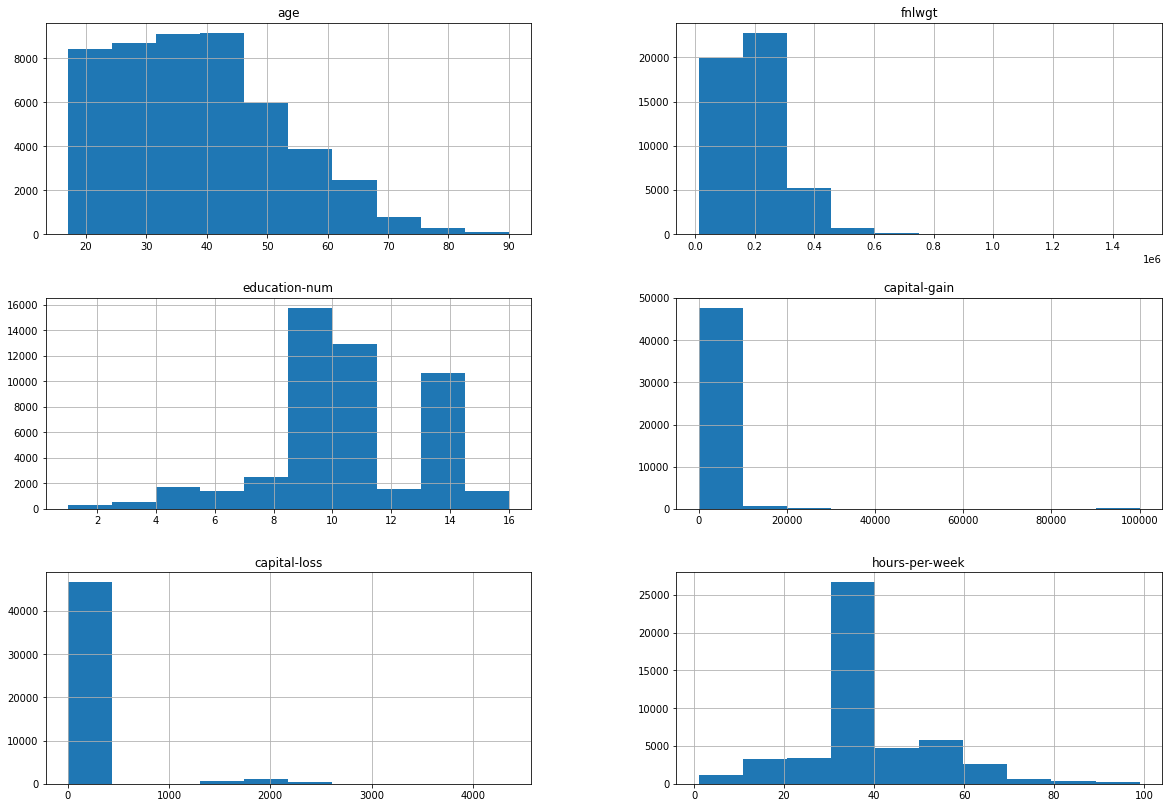

In [24]:
_ = adult_census.hist(figsize=(20, 14))

<div class="admonition tip alert alert-warning">
<p class="first admonition-title" style="font-weight: bold;">Tip</p>
<p class="last">In the previous cell, we used the following pattern: <tt class="docutils literal">_ = func()</tt>. We do this
to avoid showing the output of <tt class="docutils literal">func()</tt> which in this case is not that
useful. We actually assign the output of <tt class="docutils literal">func()</tt> into the variable <tt class="docutils literal">_</tt>
(called underscore). By convention, in Python the underscore variable is used
as a "garbage" variable to store results that we are not interested in.</p>
</div>

## Inspecting categorical data

In [25]:
adult_census["sex"].value_counts()

 Male      32650
 Female    16192
Name: sex, dtype: int64

In [26]:
adult_census["education"].value_counts()

 HS-grad         15784
 Some-college    10878
 Bachelors        8025
 Masters          2657
 Assoc-voc        2061
 11th             1812
 Assoc-acdm       1601
 10th             1389
 7th-8th           955
 Prof-school       834
 9th               756
 12th              657
 Doctorate         594
 5th-6th           509
 1st-4th           247
 Preschool          83
Name: education, dtype: int64

## Inspecting relation between two variables

In [27]:
pd.crosstab(index=adult_census["education"], columns=adult_census["education-num"])

education-num,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
education,,,,,,,,,,,,,,,,
10th,0,0,0,0,0,1389,0,0,0,0,0,0,0,0,0,0
11th,0,0,0,0,0,0,1812,0,0,0,0,0,0,0,0,0
12th,0,0,0,0,0,0,0,657,0,0,0,0,0,0,0,0
1st-4th,0,247,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5th-6th,0,0,509,0,0,0,0,0,0,0,0,0,0,0,0,0
7th-8th,0,0,0,955,0,0,0,0,0,0,0,0,0,0,0,0
9th,0,0,0,0,756,0,0,0,0,0,0,0,0,0,0,0
Assoc-acdm,0,0,0,0,0,0,0,0,0,0,0,1601,0,0,0,0
Assoc-voc,0,0,0,0,0,0,0,0,0,0,2061,0,0,0,0,0


This shows that `"education"` and `"education-num"` give you the same
information. For example, `"education-num"=2` is equivalent to
`"education"="1st-4th"`. In practice that means we can remove
`"education-num"` without losing information. Note that having redundant (or
highly correlated) columns can be a problem for machine learning algorithms.

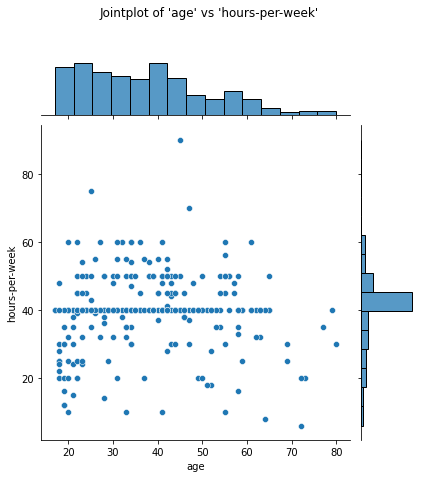

In [37]:
# number of points to visualize to have a clearer plot
num_points_to_plot = 300

_ = sns.jointplot(data=adult_census[:num_points_to_plot], x="age",
              y="hours-per-week", marginal_kws=dict(bins=15))
_ = plt.suptitle("Jointplot of 'age' vs 'hours-per-week'", y=1.1)

### Variables in relation to target

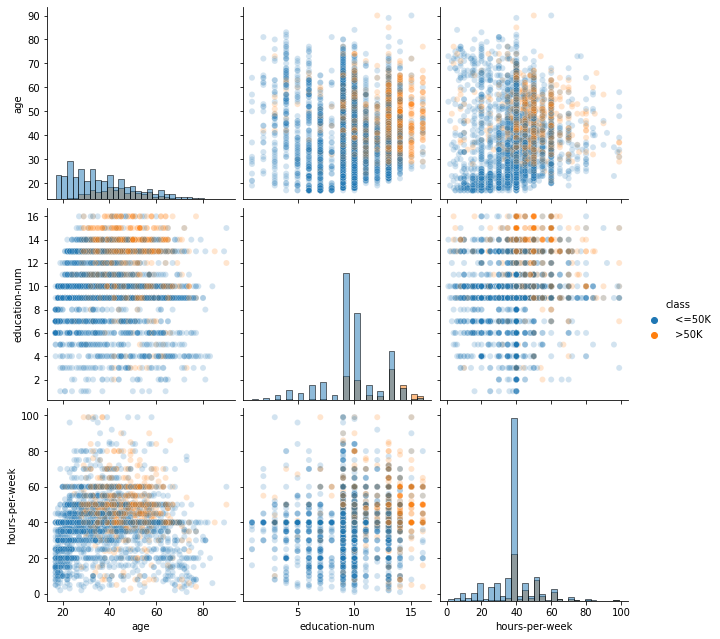

In [33]:
# We will plot a subset of the data to keep the plot readable and make the
# plotting faster
n_samples_to_plot = 5000
columns = ["age", "education-num", "hours-per-week"]
_ = sns.pairplot(
    data=adult_census[:n_samples_to_plot],
    vars=columns,
    hue=target_column,
    plot_kws={"alpha": 0.2},
    height=3,
    diag_kind="hist",
    diag_kws={"bins": 30},
)